In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [2]:
dados = pd.read_excel('/content/BaseDados_FlorestaDeDecisão.xlsx')

In [3]:
dados

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2
...,...,...,...,...,...
495,496,24,389,19026,1
496,497,47,967,19022,1
497,498,58,1520,19019,2
498,499,72,3155,19029,3


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [5]:
dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


In [6]:
#serviço é uma variável categórica
# 1 - nao usou
# 2 - serviço
# 3 - furto

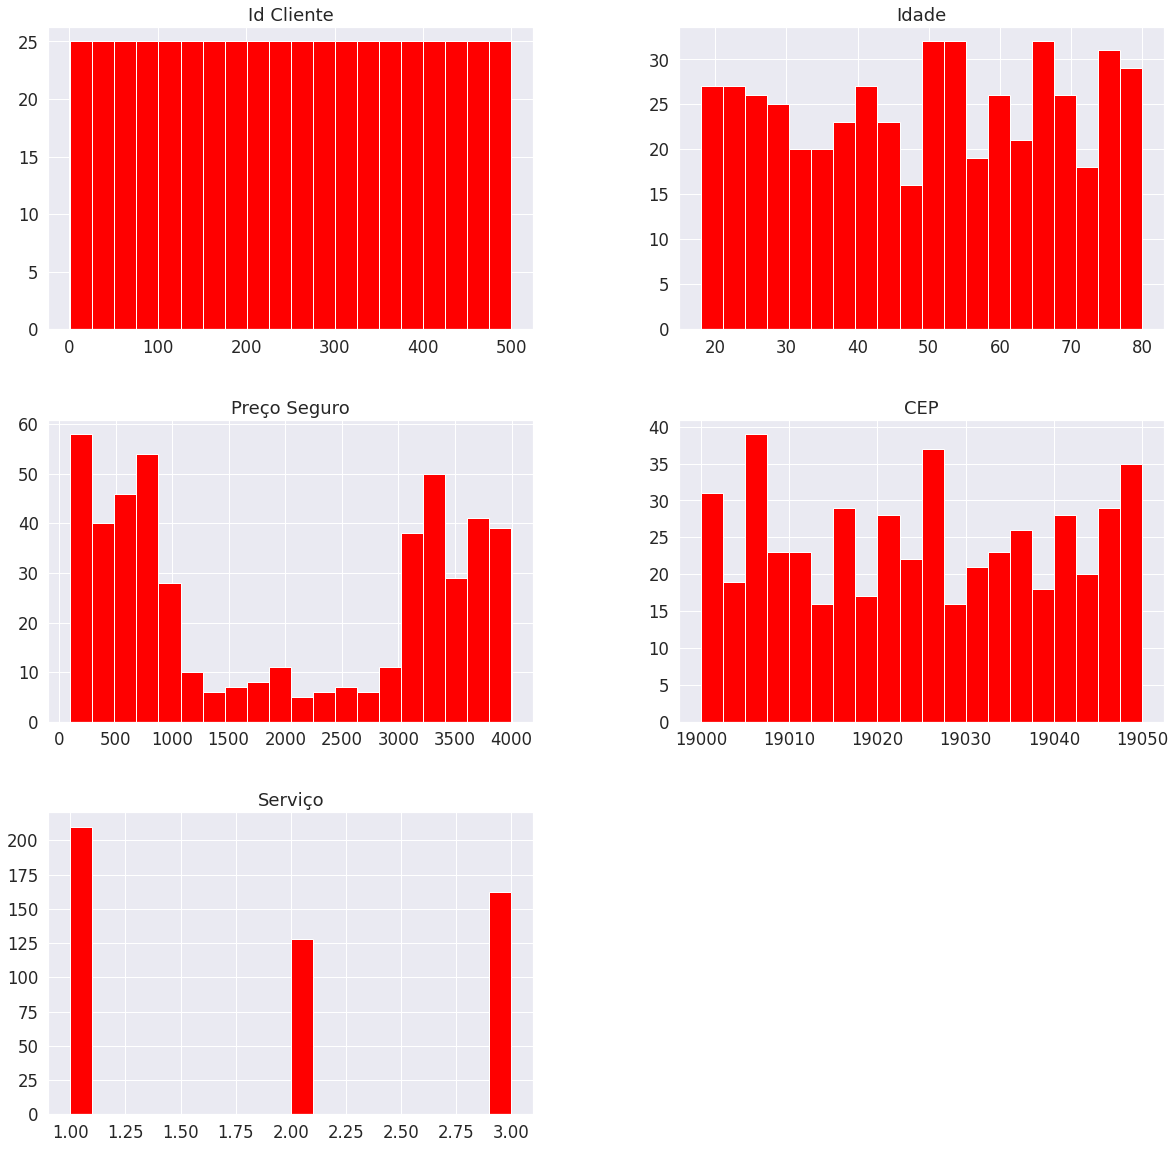

In [7]:
sns.set( font_scale=1.5, rc={'figure.figsize':(20,20)})
eixo = dados.hist(bins=20, color='red')

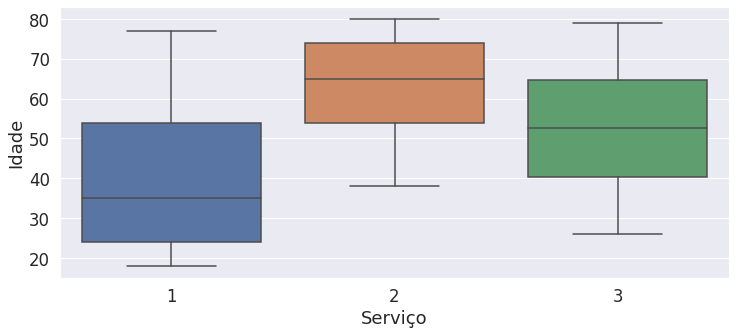

In [8]:
plt.figure( figsize=(12,5))
sns.boxplot(data=dados, x='Serviço', y='Idade')
plt.show()

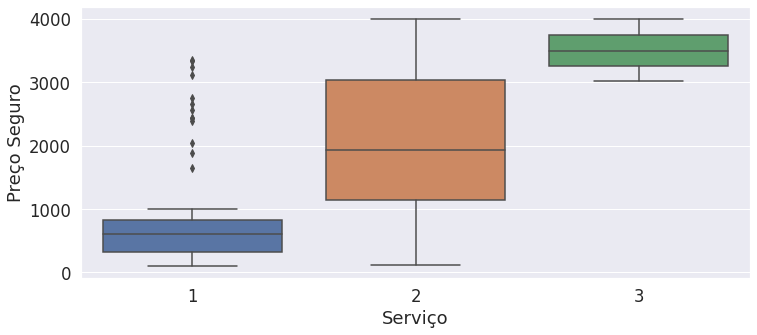

In [9]:
plt.figure( figsize=(12,5) ) 
sns.boxplot(data=dados, x='Serviço', y='Preço Seguro');

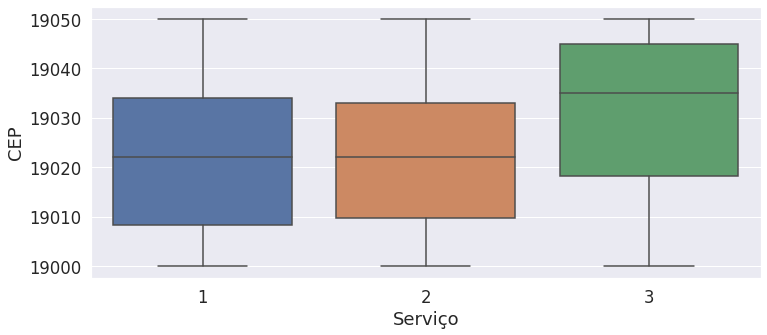

In [10]:
plt.figure( figsize=(12,5))
sns.boxplot(data=dados, x='Serviço', y='CEP');

In [11]:
X = dados.iloc[:, 1:4].values
y = dados['Serviço'].values

In [12]:
X

array([[   69,  3930, 19005],
       [   27,  3336, 19027],
       [   49,  3936, 19001],
       ...,
       [   58,  1520, 19019],
       [   72,  3155, 19029],
       [   54,  3656, 19034]])

In [13]:
y

array([3, 1, 3, 1, 2, 3, 1, 3, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       3, 2, 1, 1, 3, 3, 3, 3, 1, 1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 3, 3, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 3, 3, 1, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2,
       3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 2,
       3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 1, 3,
       3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 1, 2, 2,
       1, 3, 3, 3, 3, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1,
       2, 3, 1, 1, 2, 3, 1, 2, 3, 3, 1, 3, 2, 3, 1, 2, 1, 3, 3, 1, 1, 3,
       2, 1, 1, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 1, 3,
       1, 2, 3, 2, 1, 3, 1, 1, 2, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 1, 3, 3,
       2, 1, 1, 3, 3, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2, 3, 1, 1, 1, 2, 3,
       1, 3, 2, 1, 3, 1, 1, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 3, 3, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1,

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.70, random_state=10)

print(len(X_train))
print(len(X_valid))

350
150


In [15]:
dados.shape[0]

500

In [16]:
from sklearn.ensemble import RandomForestClassifier

algoritmo_floresta_aleatoria = RandomForestClassifier( n_estimators=500)
algoritmo_floresta_aleatoria.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

[[60  3  1]
 [ 6 22  8]
 [ 0  1 49]]


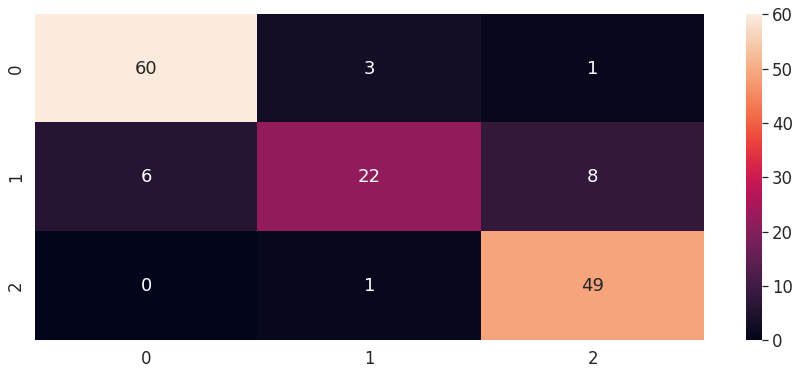

In [17]:
previsoes = algoritmo_floresta_aleatoria.predict(X_valid)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_valid, previsoes)
print(matriz_confusao)

plt.figure(figsize=(15,6))
sns.heatmap(matriz_confusao, annot=True)

In [18]:
#abc

In [19]:
#acurácia do modelo.
from sklearn.metrics import classification_report

report = classification_report(y_valid, previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.98      0.91        50

    accuracy                           0.87       150
   macro avg       0.87      0.84      0.85       150
weighted avg       0.87      0.87      0.87       150



In [21]:
novas_vendas = pd.read_excel('/content/BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')
novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [22]:
prever = novas_vendas.iloc[:, 1:4].values #isso aqui seria o X

#criando uma nova coluna
novas_vendas['Previsão do Modelo'] = algoritmo_floresta_aleatoria.predict(prever)

In [24]:
novas_vendas['Previsão do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsão do Modelo, dtype: int64